In [29]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd

%matplotlib inline

#### Caminho para pastas controle e desmatamento:
#pastacont='/home/andre/Desktop/Resultados_3/Saidas/Controle'
#pastadesm='/home/andre/Desktop/Resultados_3/Saidas/Desmatamento'
pastacont='/home/andre/Desktop/Resultados_3/Saidas/Controle/09-Setembro/14UTC'
pastadesm='/home/andre/Desktop/Resultados_3/Saidas/Desmatamento/09-Setembro/14UTC'

#### Listas, na ordem, para chegar nos arquivos "analysis-reffready-final.csv", "analysis-2012.csv",
#, "analysis-2013.csv", "analysis-2014.csv", "analysis-2015.csv", "AT-WET(ou DRY)-reffready.csv", 
#, "PR-WET(ou DRY)-reffready.csv", "RB-WET(ou DRY)-reffready.csv" e "AF-WET(ou DRY)-reffready": meses -> horas
months=['01-Janeiro','02-Fevereiro','03-Marco','04-Abril','05-Maio','06-Junho','07-Julho','08-Agosto','09-Setembro','10-Outubro','11-Novembro','12-Dezembro']
UTCs=['11UTC','12UTC','13UTC','14UTC','15UTC','16UTC','17UTC','18UTC','19UTC','20UTC']

#### Lista com o cabeçalho dos arquivos "analysis-reffready-final.csv":
cols=['sat','wavelenght','site','season','year','julian','hhmmss','sza','vza','ref063','ref390','temp','reff','phase','tcw','thi']

#### Listas, na ordem, para chegar nos arquivos "goes13.2012.001.114519_box25_lat-2.13_lon-59.0_cloudreflectance063":
# meses -> horas -> anos -> sites
years=['2012','2013','2014','2015']
sites=['PR','AT','RB','AF']

#### Lista com os dados das horas:
horas_local=[7.75,8.75,9.75,10.75,11.75,12.75,13.75,14.75,15.75,16.75]

In [30]:
# Pegando somente o caminho dos arquivos "analysis-reffready-final.csv" para o grupo CTRL:
datac=sorted(glob.glob(pastacont+'/*final.csv'))
# Pegando somente o caminho dos arquivos "analysis-reffready-final.csv" para o grupo DESM:
datad=sorted(glob.glob(pastadesm+'/*final.csv'))

# Arrumando os dados para os sites PR e AT (grupo controle):
for file in datac:
    dadosc = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
    goodc=(dadosc.ref063>=0.30)&(dadosc.temp<284.15)&(dadosc.site=='PR')&(dadosc.reff>0)&(dadosc.reff<=60)&(dadosc.sza<=75)
    celsiusc = (dadosc.temp[goodc])-273.15
    reff_vc = dadosc.reff[goodc] 
    r063c = dadosc.ref063[goodc]*100
    r390c = dadosc.ref390[goodc]*100
    SZAc = dadosc.sza[goodc]
    VZAc = dadosc.vza[goodc]
    mu0c = np.cos(SZAc/180.0*np.pi)
    sitioc = dadosc.site[goodc]  
for file in datac:
    dadosc2 = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
    goodc2=(dadosc2.ref063>=0.30)&(dadosc2.temp<284.15)&(dadosc2.site=='AT')&(dadosc2.reff>0)&(dadosc2.reff<=60)&(dadosc2.sza<=75)
    celsiusc2 = (dadosc2.temp[goodc2])-273.15
    reff_vc2 = dadosc2.reff[goodc2] 
    r063c2 = dadosc2.ref063[goodc2]*100
    r390c2 = dadosc2.ref390[goodc2]*100
    SZAc2 = dadosc2.sza[goodc2]
    VZAc2 = dadosc2.vza[goodc2]
    mu0c2 = np.cos(SZAc2/180.0*np.pi)
    sitioc2 = dadosc2.site[goodc2]
    
# Arrumando os dados para os sites RB e AF (grupo desmatamento):  
for file in datad:
    dadosd = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
    goodd=(dadosd.ref063>=0.35)&(dadosd.temp<284.15)&(dadosd.site=='RB')&(dadosd.reff>0)&(dadosd.reff<=60)&(dadosd.sza<=75)
    celsiusd = (dadosd.temp[goodd])-273.15
    reff_vd = dadosd.reff[goodd] 
    r063d = dadosd.ref063[goodd]*100
    r390d = dadosd.ref390[goodd]*100
    SZAd = dadosd.sza[goodd]
    VZAd = dadosd.vza[goodd]
    mu0d = np.cos(SZAd/180.0*np.pi)
    sitiod = dadosd.site[goodd]
for file in datad:
    dadosd2 = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
    goodd2=(dadosd2.ref063>=0.35)&(dadosd2.temp<284.15)&(dadosd2.site=='AF')&(dadosd2.reff>0)&(dadosd2.reff<=60)&(dadosd2.sza<=75)
    celsiusd2 = (dadosd2.temp[goodd2])-273.15
    reff_vd2 = dadosd2.reff[goodd2] 
    r063d2 = dadosd2.ref063[goodd2]*100
    r390d2 = dadosd2.ref390[goodd2]*100
    SZAd2 = dadosd2.sza[goodd2]
    VZAd2 = dadosd2.vza[goodd2]
    mu0d2 = np.cos(SZAd2/180.0*np.pi)
    sitiod2 = dadosd2.site[goodd2]    

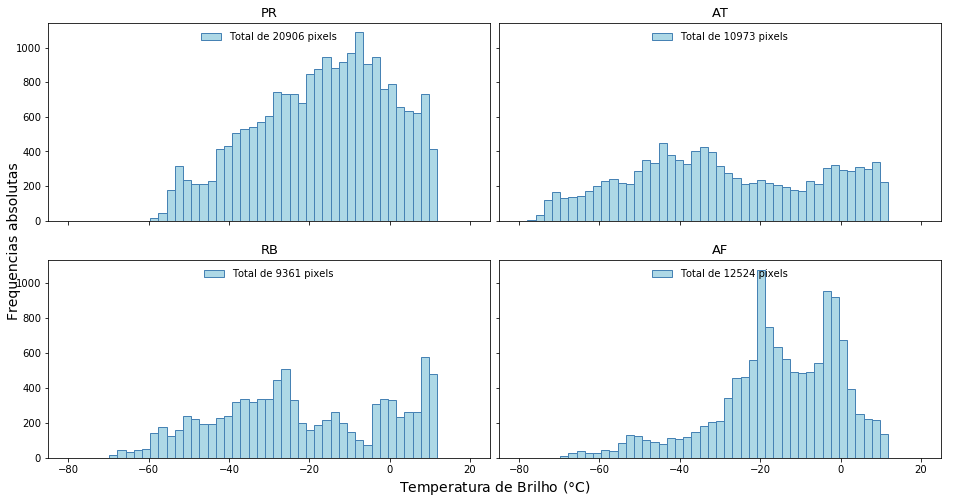

In [31]:
-

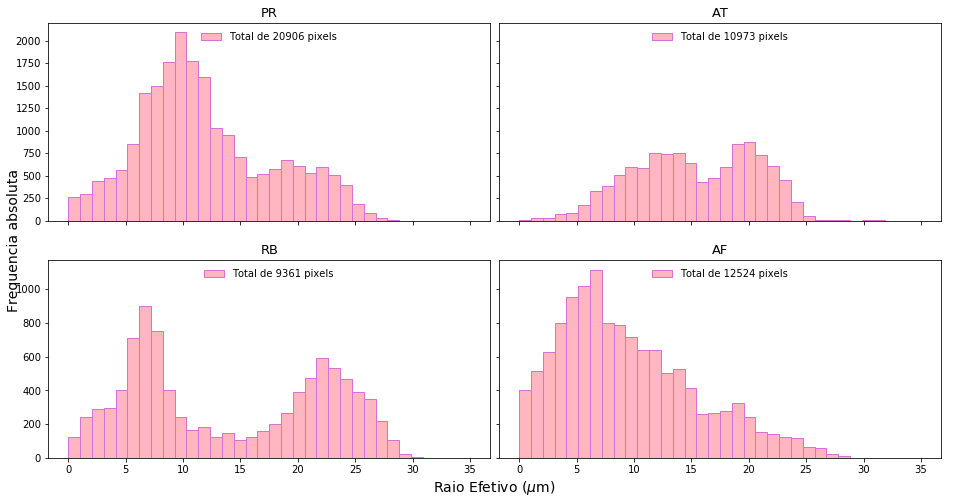

In [32]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16,8))
fig.add_subplot(111, frameon=False)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Raio Efetivo ($\\mu$m)', fontsize=14)
plt.ylabel("Frequencia absoluta", fontsize=14)
tbins=np.linspace(0,35,num=35)

ax[0, 0].hist(reff_vc, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightpink', edgecolor='orchid', 
              label='Total de {} pixels'.format(len(reff_vc)))
ax[0, 0].legend(loc=9, frameon=False)
ax[0, 0].set_title('PR', fontsize=13)
ax[0, 1].hist(reff_vc2, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightpink', edgecolor='orchid',
             label='Total de {} pixels'.format(len(reff_vc2)))
ax[0, 1].legend(loc=9, frameon=False)
ax[0, 1].set_title('AT', fontsize=13)
ax[1, 0].hist(reff_vd, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightpink', edgecolor='orchid',
             label='Total de {} pixels'.format(len(reff_vd)))
ax[1, 0].legend(loc=9, frameon=False)
ax[1, 0].set_title('RB', fontsize=13)
ax[1, 1].hist(reff_vd2, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightpink', edgecolor='orchid',
              label='Total de {} pixels'.format(len(reff_vd2)))
ax[1, 1].set_title('AF', fontsize=13)
ax[1, 1].legend(loc=9, frameon=False)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
          140.,  2505.,  3652.,  2569.,  1866.,   537.,   922.,   333.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.]),
 array([  0.        ,   1.53061224,   3.06122449,   4.59183673,
          6.12244898,   7.65306122,   9.18367347,  10.71428571,
         12.24489796,  13.7755102 ,  15.30612245,  16.83673469,
         18.36734694,  19.89795918,  21.42857143,  22.95918367,
         24.48979592,  26.02040816,  27.55102041,  29.08163265,
         30.6122449 ,  32.14285714,  33.67346939,  35.20408163,
         36.73469388,  38.26530612,  39.79591837,  41.32653061,
         42.85714286,  44.3877551 ,  45.91836735,  47.44897959,
         48.97959184,  50.51020408,  5

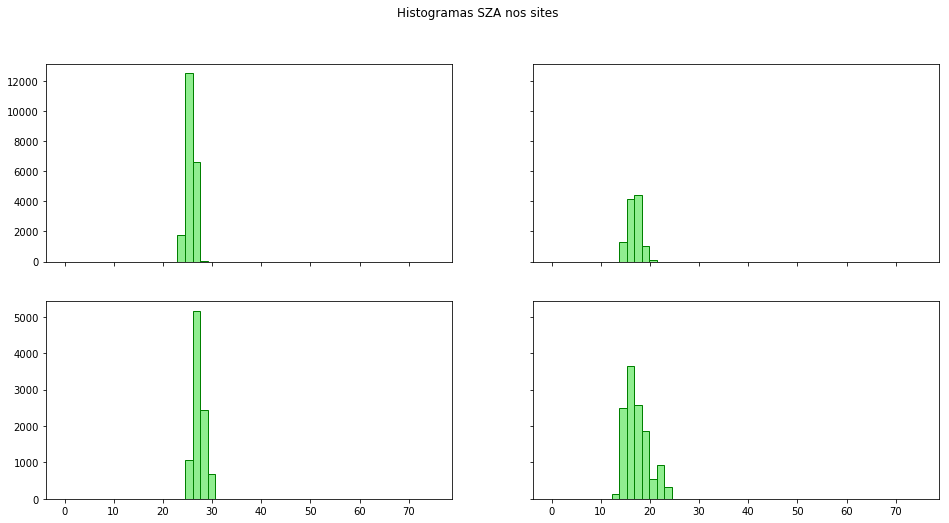

In [33]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16,8))
tbins=np.linspace(0.0,75,num=50)
fig.suptitle("Histogramas SZA nos sites")

ax[0, 0].hist(SZAc, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightgreen', edgecolor='green')
ax[0, 1].hist(SZAc2, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightgreen', edgecolor='green')
ax[1, 0].hist(SZAd, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightgreen', edgecolor='green')
ax[1, 1].hist(SZAd2, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightgreen', edgecolor='green')

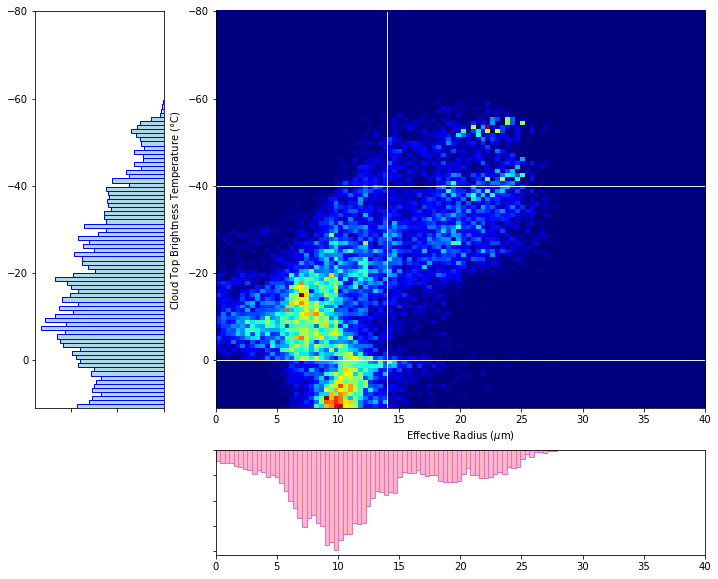

In [34]:
# Histograma 2D site PR
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.grid(False)

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax, xlim=(0,40))
#color = fig.add_subplot(grid[-1, 0], xticklabels=[])

im = main_ax.hist2d(reff_vc, celsiusc, bins=100, cmap='jet', range=((0, 40), (-80, 11)))
main_ax.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
main_ax.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
main_ax.plot((0, 40), (0, 0), 'w-', linewidth=0.92)

# histogram on the attached axes
x_hist.hist(reff_vc, 75, histtype='bar', orientation='vertical', color='lightpink', edgecolor='orchid')
x_hist.invert_yaxis()

y_hist.hist(celsiusc, 75, histtype='bar', orientation='horizontal', color='lightblue', edgecolor='blue')
y_hist.invert_yaxis()
y_hist.invert_xaxis()

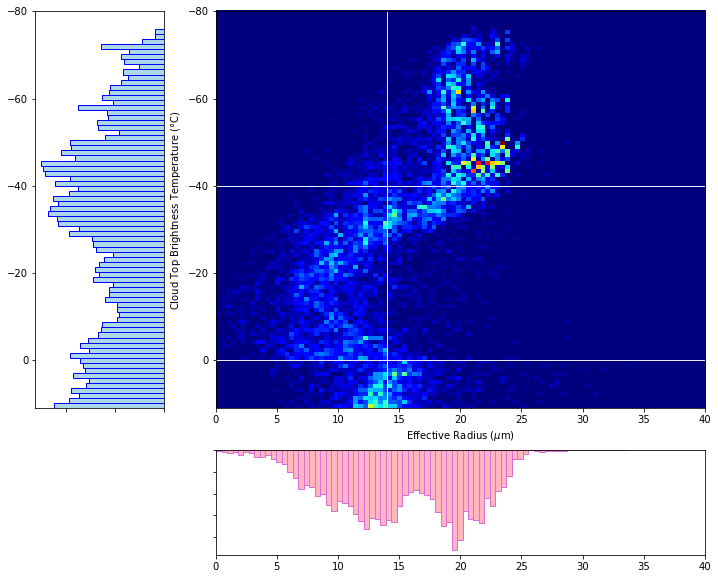

In [35]:
# Histograma 2D site AT
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.grid(False)

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax, xlim=(0,40))
#color = fig.add_subplot(grid[-1, 0], xticklabels=[])

im = main_ax.hist2d(reff_vc2, celsiusc2, bins=100, cmap='jet', range=((0, 40), (-80, 11)))
main_ax.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
main_ax.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
main_ax.plot((0, 40), (0, 0), 'w-', linewidth=0.92)

# histogram on the attached axes
x_hist.hist(reff_vc2, 75, histtype='bar', orientation='vertical', color='lightpink', edgecolor='orchid')
x_hist.invert_yaxis()

y_hist.hist(celsiusc2, 75, histtype='bar', orientation='horizontal', color='lightblue', edgecolor='blue')
y_hist.invert_yaxis()
y_hist.invert_xaxis()

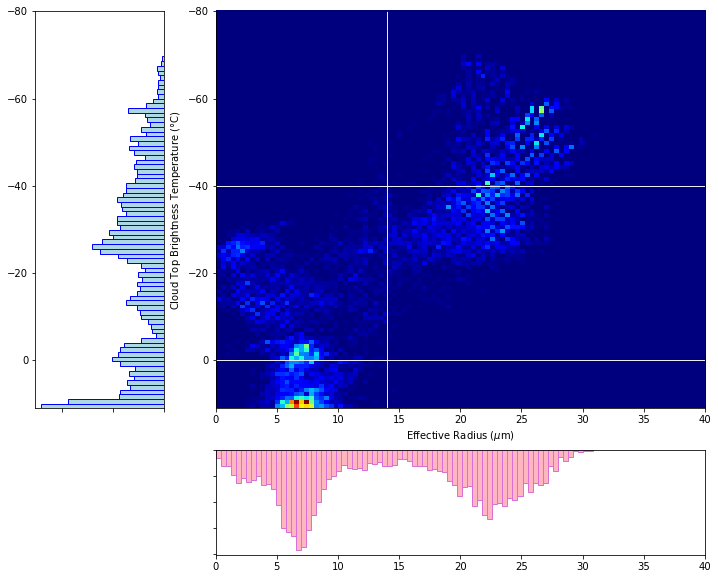

In [36]:
# Histograma 2D site RB
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.grid(False)

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax, xlim=(0,40))
#color = fig.add_subplot(grid[-1, 0], xticklabels=[])

# scatter points on the main axes
#main_ax.plot(reff_v, celsius, '.', markersize=1.5, color='0.5')
im = main_ax.hist2d(reff_vd, celsiusd, bins=100, cmap='jet', range=((0, 40), (-80, 11)))
main_ax.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
main_ax.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
main_ax.plot((0, 40), (0, 0), 'w-', linewidth=0.92)

# histogram on the attached axes
x_hist.hist(reff_vd, 75, histtype='bar', orientation='vertical', color='lightpink', edgecolor='orchid')
x_hist.invert_yaxis()

y_hist.hist(celsiusd, 75, histtype='bar', orientation='horizontal', color='lightblue', edgecolor='blue')
y_hist.invert_yaxis()
y_hist.invert_xaxis()

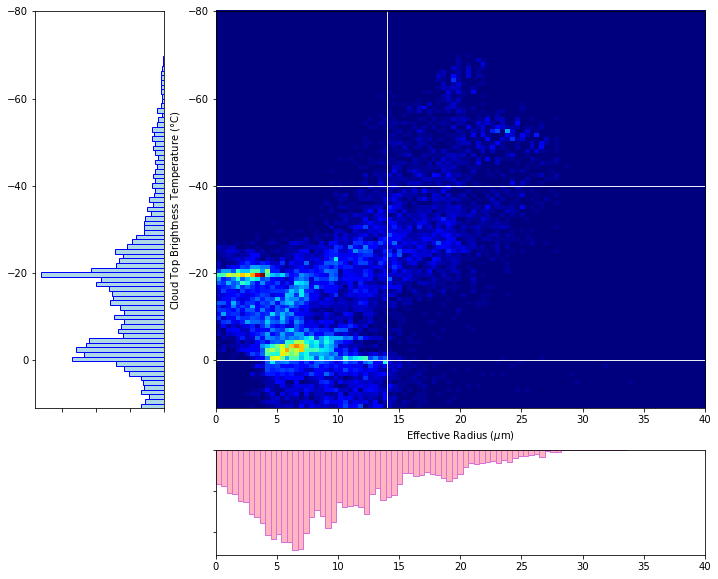

In [37]:
# Histograma 2D site AF
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.grid(False)

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax, xlim=(0,40))
#color = fig.add_subplot(grid[-1, 0], xticklabels=[])

# scatter points on the main axes
#main_ax.plot(reff_v, celsius, '.', markersize=1.5, color='0.5')
im = main_ax.hist2d(reff_vd2, celsiusd2, bins=100, cmap='jet', range=((0, 40), (-80, 11)))
main_ax.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
main_ax.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
main_ax.plot((0, 40), (0, 0), 'w-', linewidth=0.92)

# histogram on the attached axes
x_hist.hist(reff_vd2, 75, histtype='bar', orientation='vertical', color='lightpink', edgecolor='orchid')
x_hist.invert_yaxis()

y_hist.hist(celsiusd2, 75, histtype='bar', orientation='horizontal', color='lightblue', edgecolor='blue')
y_hist.invert_yaxis()
y_hist.invert_xaxis()

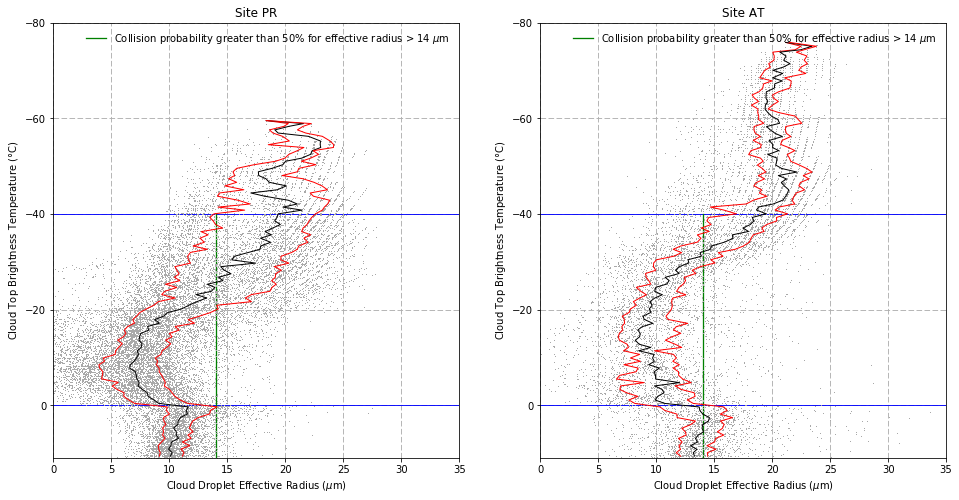

In [38]:
# Temperature x Reff geral Sites Controle
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
plt.title('Site PR')
#Limites nos eixos
plt.xlim([0.0, 35])  
plt.ylim([11,-80])
#plt.ylim([30,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite entre nuvens frias e mistas
plt.plot((0, 35), (-40, -40), 'b-', linewidth=0.9, label='')
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (30, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_vc, celsiusc, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [11, -80.0] # inverted temperature limits
#nzlims = [30, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsiusc>=zbins[bid])
    else:
        dataid = (celsiusc>=zbins[bid]) & (celsiusc<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_vc[dataid]
        tempdata=celsiusc[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
                plt.plot(p50,tmp, color='black', linewidth=1)
                plt.plot(p75,tmp, color='red', linewidth=1)
                plt.draw()
                
                            
fig = plt.figure(1, figsize=(16,8))
axd = plt.subplot(1, 2, 2)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
plt.title('Site AT')
#Limites nos eixos
plt.xlim([0.0, 35])  
plt.ylim([11,-80])
#plt.ylim([30,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
#Inserindo linhas de auxilio
# Limite entre nuvens frias e mistas
plt.plot((0, 35), (-40, -40), 'b-', linewidth=0.9, label='')
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (30, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_vc2, celsiusc2, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [11, -80.0] # inverted temperature limits
#nzlims = [30, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsiusc2>=zbins[bid])
    else:
        dataid = (celsiusc2>=zbins[bid]) & (celsiusc2<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_vc2[dataid]
        tempdata=celsiusc2[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
                plt.plot(p50,tmp, color='black', linewidth=1)
                plt.plot(p75,tmp, color='red', linewidth=1)
                plt.draw()        

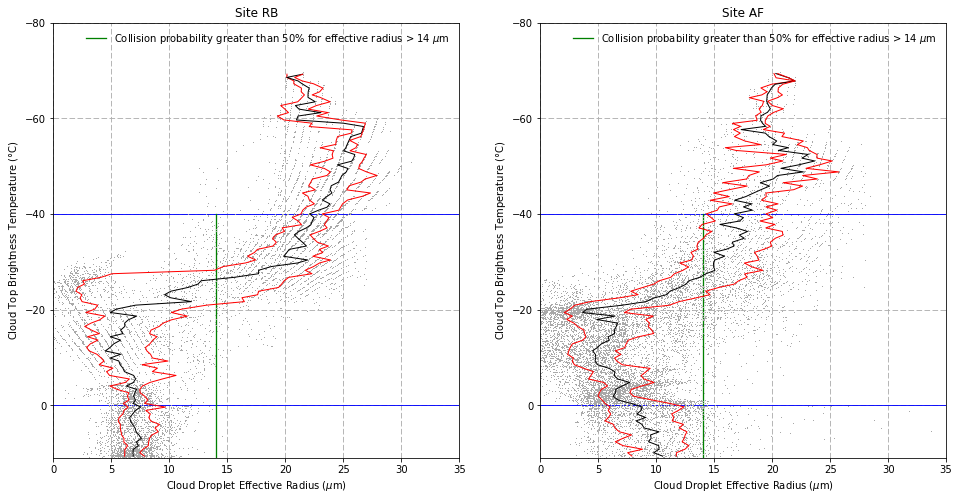

In [39]:
# Temperature x Reff geral Sites Desmatamento
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
plt.title('Site RB')
#Limites nos eixos
plt.xlim([0.0, 35])  
plt.ylim([11,-80])
#plt.ylim([30,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite entre nuvens frias e mistas
plt.plot((0, 35), (-40, -40), 'b-', linewidth=0.9, label='')
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (30, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_vd, celsiusd, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [11, -80.0] # inverted temperature limits
#nzlims = [30, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsiusd>=zbins[bid])
    else:
        dataid = (celsiusd>=zbins[bid]) & (celsiusd<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_vd[dataid]
        tempdata=celsiusd[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
                plt.plot(p50,tmp, color='black', linewidth=1)
                plt.plot(p75,tmp, color='red', linewidth=1)
                plt.draw()
                
                            
fig = plt.figure(1, figsize=(16,8))
axd = plt.subplot(1, 2, 2)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
plt.title('Site AF')
#Limites nos eixos
plt.xlim([0.0, 35])  
plt.ylim([11,-80])
#plt.ylim([30,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
#Inserindo linhas de auxilio
# Limite entre nuvens frias e mistas
plt.plot((0, 35), (-40, -40), 'b-', linewidth=0.9, label='')
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (30, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_vd2, celsiusd2, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [11, -80.0] # inverted temperature limits
#nzlims = [30, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsiusd2>=zbins[bid])
    else:
        dataid = (celsiusd2>=zbins[bid]) & (celsiusd2<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_vd2[dataid]
        tempdata=celsiusd2[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
                plt.plot(p50,tmp, color='black', linewidth=1)
                plt.plot(p75,tmp, color='red', linewidth=1)
                plt.draw()        

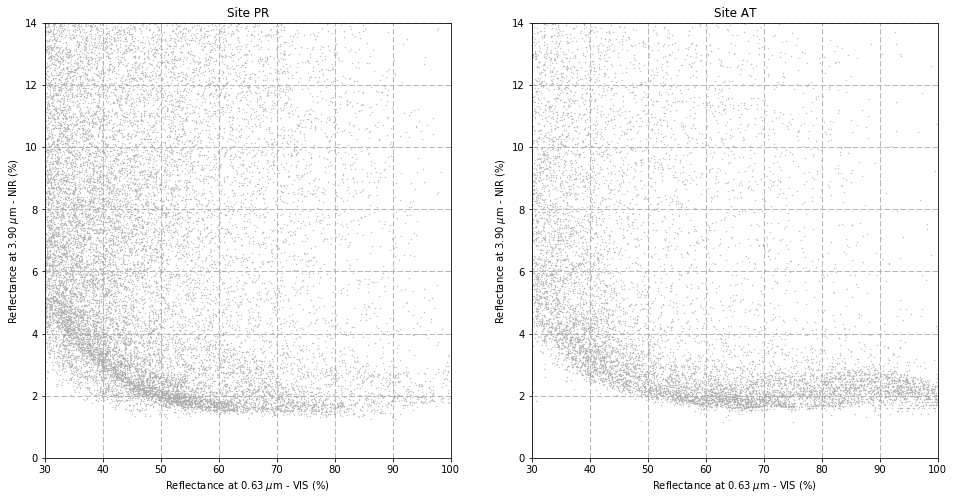

In [40]:
# Kaufman Nakajima Sites Controle
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.title('Site PR')
plt.xlim([30, 100])  
plt.ylim([0,14])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063c, r390c, color='0.662', linestyle='None', markersize=0.7, marker='.')

fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 2)
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.title('Site AT')
plt.xlim([30, 100])  
plt.ylim([0,14])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063c2, r390c2, color='0.662', linestyle='None', markersize=0.7, marker='.')
                            

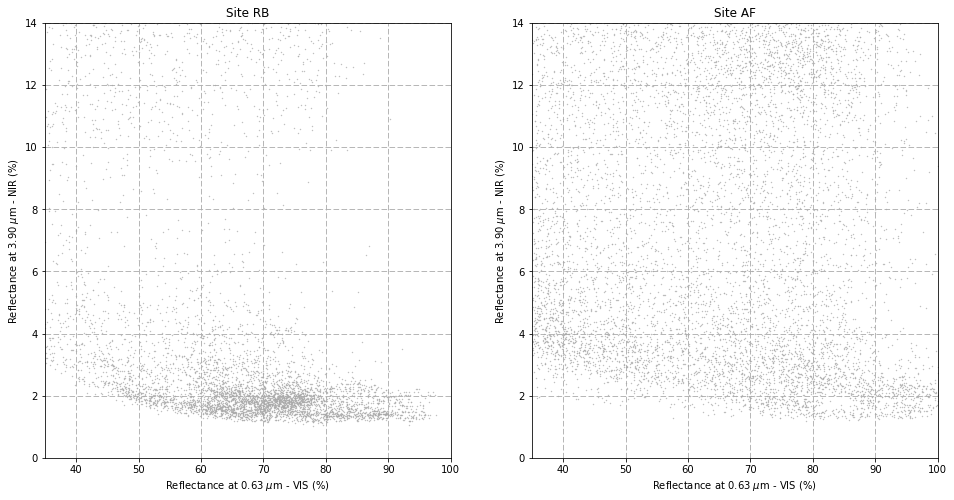

In [41]:
# Kaufman Nakajima Sites Desmatamento
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.title('Site RB')
plt.xlim([35, 100])  
plt.ylim([0,14])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063d, r390d, color='0.662', linestyle='None', markersize=0.7, marker='.')

fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 2)
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.title('Site AF')
plt.xlim([35, 100])  
plt.ylim([0,14])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063d2, r390d2, color='0.662', linestyle='None', markersize=0.7, marker='.')

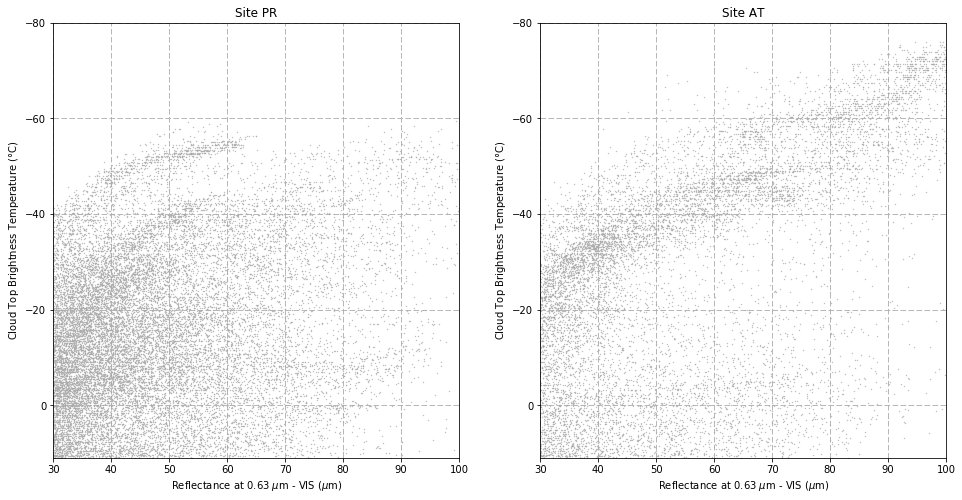

In [42]:
# TempxVIS Sites Controle
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', fontsize='medium')
plt.title('Site PR')
plt.ylim([11, -80])  
plt.xlim([30,100])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063c, celsiusc, color='0.662', linestyle='None', markersize=0.7, marker='.')

fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 2)
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', fontsize='medium')
plt.title('Site AT')
plt.ylim([11, -80])  
plt.xlim([30,100])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063c2, celsiusc2, color='0.662', linestyle='None', markersize=0.7, marker='.')

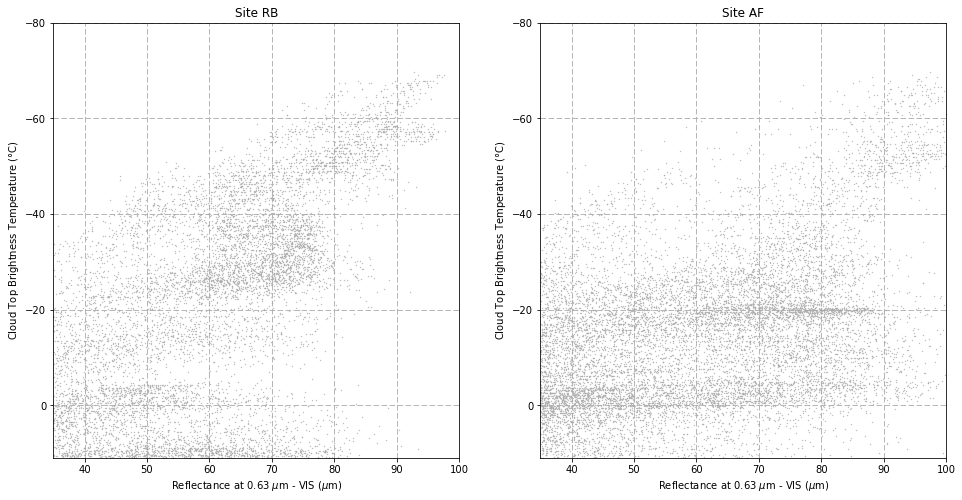

In [43]:
# TempxVIS Sites Desmatamento
fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 1)
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', fontsize='medium')
plt.title('Site RB')
plt.ylim([11, -80])  
plt.xlim([35,100])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063d, celsiusd, color='0.662', linestyle='None', markersize=0.7, marker='.')

fig = plt.figure(1, figsize=(16,8))
axc = plt.subplot(1, 2, 2)
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', fontsize='medium')
plt.title('Site AF')
plt.ylim([11, -80])  
plt.xlim([35,100])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
# Plotando os dados
plt.plot(r063d2, celsiusd2, color='0.662', linestyle='None', markersize=0.7, marker='.')

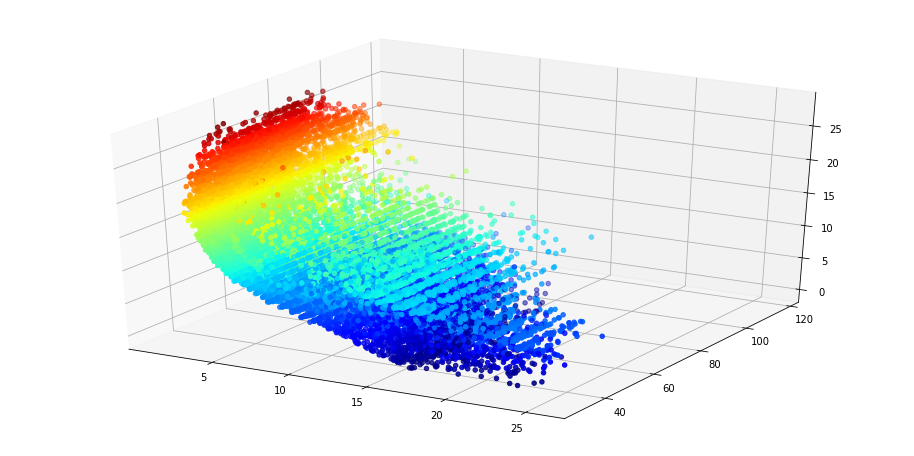

In [44]:
#######################################################################
from mpl_toolkits import mplot3d
%matplotlib inline
plt.figure(1, figsize=(16,8))
ax2 = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax2.scatter3D(r390c, r063c, reff_vc, c=reff_vc, cmap='jet')

(35, 110)

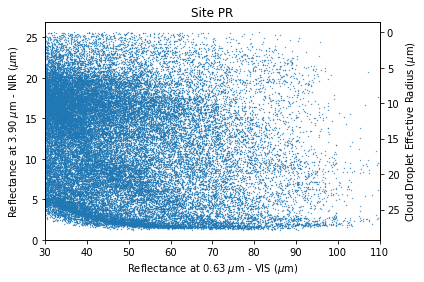

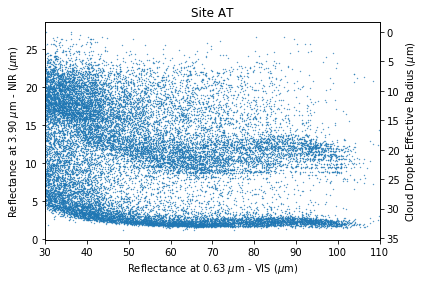

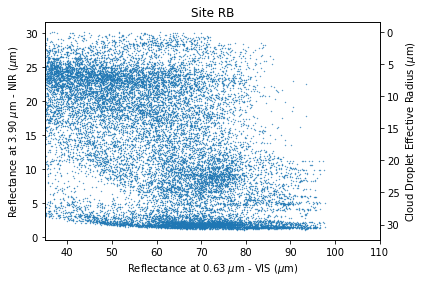

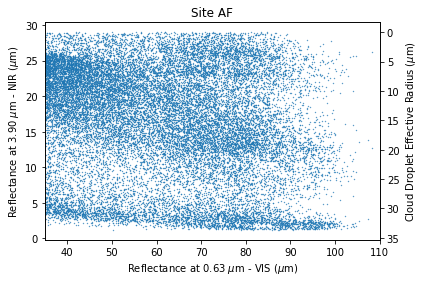

In [45]:
plt.figure(1, figsize=(16,8))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(r063c, r390c, linestyle='None', markersize=0.7, marker='.')
ax2.plot(r063c, reff_vc, linestyle='None', markersize=0.7, marker='.')
ax2.invert_yaxis()
ax1.set_xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', color='k')
ax1.set_ylabel('Reflectance at 3.90 $\\mu$m - NIR ($\\mu$m)', color='k')
ax2.set_ylabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium', color='k')
plt.title('Site PR')
plt.xlim(30,110)

plt.figure(1, figsize=(16,8))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(r063c2, r390c2, linestyle='None', markersize=0.7, marker='.')
ax2.plot(r063c2, reff_vc2, linestyle='None', markersize=0.7, marker='.')
ax2.invert_yaxis()
ax1.set_xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', color='k')
ax1.set_ylabel('Reflectance at 3.90 $\\mu$m - NIR ($\\mu$m)', color='k')
ax2.set_ylabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium', color='k')
plt.title('Site AT')
plt.xlim(30,110)

plt.figure(1, figsize=(16,8))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(r063d, r390d, linestyle='None', markersize=0.7, marker='.')
ax2.plot(r063d, reff_vd, linestyle='None', markersize=0.7, marker='.')
ax2.invert_yaxis()
ax1.set_xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', color='k')
ax1.set_ylabel('Reflectance at 3.90 $\\mu$m - NIR ($\\mu$m)', color='k')
ax2.set_ylabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium', color='k')
plt.title('Site RB')
plt.xlim(35,110)

plt.figure(1, figsize=(16,8))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(r063d2, r390d2, linestyle='None', markersize=0.7, marker='.')
ax2.plot(r063d2, reff_vd2, linestyle='None', markersize=0.7, marker='.')
ax2.invert_yaxis()
ax1.set_xlabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', color='k')
ax1.set_ylabel('Reflectance at 3.90 $\\mu$m - NIR ($\\mu$m)', color='k')
ax2.set_ylabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium', color='k')
plt.title('Site AF')
plt.xlim(35,110)
# plt.show()